In [39]:
import pandas as pd
from functools import reduce
from plotly import graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
home_page_table = pd.read_csv('data/home_page_table.csv')
home_page_table.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [5]:
home_page_table.shape

(90400, 2)

In [6]:
payment_confirmation_table = pd.read_csv('data/payment_confirmation_table.csv')
payment_confirmation_table.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [7]:
payment_confirmation_table.shape

(452, 2)

In [8]:
payment_page_table = pd.read_csv('data/payment_page_table.csv')
payment_page_table.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [9]:
payment_page_table.shape

(6030, 2)

In [10]:
search_page_table = pd.read_csv('data/search_page_table.csv')
search_page_table.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [11]:
search_page_table.shape

(45200, 2)

In [12]:
user_table = pd.read_csv('data/user_table.csv')
user_table.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [13]:
user_table.shape 

(90400, 4)

In [14]:
home_page_table.rename(columns={"page":"home_page"}, inplace=True)
search_page_table.rename(columns={"page":"search_page"}, inplace=True)
payment_page_table.rename(columns={"page":"payment_page"}, inplace=True)
payment_confirmation_table.rename(columns={"page":"payment_confirmation_page"}, inplace=True)

Выполняем merge с помощью reduce

In [15]:
data_frames = [user_table,home_page_table, search_page_table, payment_page_table, payment_confirmation_table]

In [16]:
user_table = reduce(lambda x, y: pd.merge(x, y, on='user_id', how='left'), data_frames)

In [17]:
user_table.shape

(90400, 8)

In [18]:
user_table.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [19]:
user_table['home_page'] = user_table['home_page']\
                                .apply(lambda x: 1 if x == 'home_page' else 0)
user_table['search_page'] = user_table['search_page']\
                                .apply(lambda x: 1 if x == 'search_page' else 0)
user_table['payment_page'] = user_table['payment_page']\
                                        .apply(lambda x: 1 if x == 'payment_page' else 0)
user_table['payment_confirmation_page'] = user_table['payment_confirmation_page']\
                                                .apply(lambda x: 1 if x == 'payment_confirmation_page' else 0)

In [20]:
user_table.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


Посмотрим на воронку продаж по типу устойств, используемых юзерами.

In [21]:
action_per_device = user_table.groupby('device').agg({'home_page':'sum',
                                 'search_page':'sum',
                                 'payment_page':'sum',
                                 'payment_confirmation_page':'sum'}).T.reset_index().rename(columns={'index':'Action'})

In [22]:
action_per_device.columns.name=''

In [23]:
action_per_device

,Action,Desktop,Mobile
0,home_page,60200,30200
1,search_page,30100,15100
2,payment_page,3010,3020
3,payment_confirmation_page,150,302


In [40]:
# Настраиваем скрипт библиотеки Plotly нашими параметрами
fig = go.Figure()
# Часть графика для пользователей с ПК
fig.add_trace(go.Funnel(
    y = action_per_device['Action'],
    x = action_per_device['Desktop'],
    name = 'Desktop',
    constraintext='outside',
    textposition = 'inside',
    textinfo = 'value+percent previous'
    ))

# Часть графика для пользователей с мобильного телефона
fig.add_trace(go.Funnel(
    y = action_per_device['Action'],
    x = action_per_device['Mobile'],
    name = 'Mobile',
    textposition = 'auto',
    textinfo = 'value+percent previous'
   ))

fig.update_layout(
    title = 'Воронка конверсии по типу устройства пользователя',
    title_x=0.5,
    autosize=False,
    width=1200,
    height=600)

fig.show()

Итак, можно сказать, что на домашную страницу интернет-магазина заходит в два раза больше пользователей, чем с мобильных устройств. Однако конверсия в покупку выше у пользователей мобильных устройст - 10% против 5% у клиетов, использовавших компьютер. Поэтому, возможно, для увеличения конверсии в покупку среди пользователей ПК следует настроить более персонализированную рекламу или увеличить охват рекламы для мобильных пользователей.

Построим воронку продаж интернет-магазина, сегментированную по полу пользователя

In [25]:
action_per_sex = user_table.groupby('sex').agg({"home_page":'sum', 
                               'search_page':'sum',
                              'payment_page':'sum',
                              'payment_confirmation_page':'sum'}).T.reset_index().rename(columns={'index':'Action'})

In [26]:
action_per_sex.columns.name=''

In [27]:
action_per_sex

,Action,Female,Male
0,home_page,45075,45325
1,search_page,22676,22524
2,payment_page,3100,2930
3,payment_confirmation_page,241,211


In [41]:
# Настраиваем скрипт библиотеки Plotly нашими параметрами
fig = go.Figure()
# Часть графика для пользователей мужчин
fig.add_trace(go.Funnel(
    y = action_per_sex['Action'],
    x = action_per_sex['Male'],
    name = 'Male',
    constraintext='outside',
    textposition = 'inside',
    textinfo = 'value+percent previous'
    ))

# Часть графика для пользователей женщин
fig.add_trace(go.Funnel(
    y = action_per_sex['Action'],
    x = action_per_sex['Female'],
    name = 'Female',
    textposition = 'auto',
    textinfo = 'value+percent previous'
   ))

fig.update_layout(
    title = 'Воронка конверсии по полу пользователя',
    title_x=0.5,
    autosize=False,
    width=1200,
    height=600)

fig.show()

Итак, можно сказать, что пол не влияет на конверсию интернет-магазина. 7% мужчин и 8% женщин перешли на страницу подтверждения платежа, т.е. совершили покупку

Определим топ продаж по месяцу и дню недели

In [29]:
user_table.date = pd.to_datetime(user_table.date)

In [30]:
user_table['month']= user_table.date.dt.month_name()

In [31]:
user_table['weekday'] = user_table.date.dt.day_name()

In [32]:
user_table.groupby('month', as_index=False)\
            .agg({'payment_confirmation_page':'sum'})\
            .sort_values('payment_confirmation_page', ascending=False)

,month,payment_confirmation_page
2,January,189
1,February,173
0,April,46
3,March,44


Итак, по имеющимся данным можно сделать вывод, что январь - топовый месяц продаж 

In [33]:
user_table.groupby('weekday', as_index=False)\
            .agg({'payment_confirmation_page':'sum'})\
            .sort_values('payment_confirmation_page', ascending=False)

,weekday,payment_confirmation_page
1,Monday,77
2,Saturday,70
5,Tuesday,69
4,Thursday,66
3,Sunday,62
0,Friday,54
6,Wednesday,54


Больше всего покупок в интернет-магазине совершались в понедельники

Выясним, отличаются ли день максимальных покупок у покупателей-мужчин и покупателей-женщин

In [34]:
df_weekday = user_table.groupby('weekday', as_index=False)\
            .agg({'payment_confirmation_page':'sum'})\
            .sort_values('payment_confirmation_page')

In [35]:
df_weekday = df_weekday.sort_values('weekday')

<AxesSubplot:xlabel='weekday', ylabel='payment_confirmation_page'>

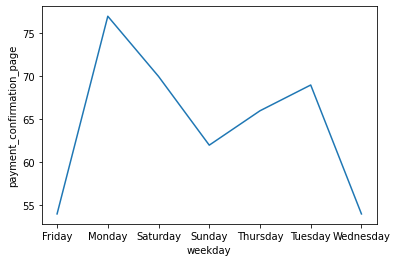

In [36]:
sns.lineplot(x='weekday', y='payment_confirmation_page', data =df_weekday)

In [37]:
df = user_table.pivot_table(values = 'payment_confirmation_page', columns='sex', index='weekday', aggfunc='sum').reset_index()
df

sex,weekday,Female,Male
0,Friday,26,28
1,Monday,43,34
2,Saturday,36,34
3,Sunday,35,27
4,Thursday,31,35
5,Tuesday,40,29
6,Wednesday,30,24


<AxesSubplot:xlabel='weekday', ylabel='Female'>

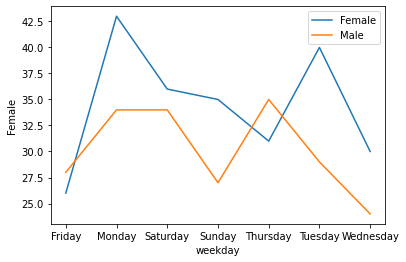

In [38]:
sns.lineplot(x='weekday', y='Female', data =df, label='Female')
sns.lineplot(x='weekday', y='Male', data =df, label='Male')


Итак, женщины чаще всего совершают покупки в понедельник, а мужщины - в четверг

Основная фича, по которой можно сегментировать пользователей интернет-магазина, это тип устройства. При этом конверсия в покупку у пользователей с мобильных устройств в 2 раза больше чем у пользователей ПК (10% и 5%). А пол человека существенно не влияет на конвесию в покупку, однако можно сказать, что женщины больше покупок совершают в понедельник и пятницу, а мужчины понедельник-вторник и четверг.